In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def load_data(file, delimiter):
    data = np.loadtxt(file, delimiter=delimiter)
    print('Shape: ', data.shape)
    print('First row: ', data[1, :])
    
    return data

### 1.1 Visualizing the data

In [3]:
def plot_data(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Find indices of positive and negative examples
    pos = data[:,2] == 1
    neg = data[:,2] == 0
    
    # Plot examples
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], label=label_pos, marker='+', color='k', linewidth=2)
    axes.scatter(data[neg][:,0], data[neg][:,1], label=label_neg, marker='o', color='y')
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend()

### 1.2.1 Warm-up: sigmoid function

In [4]:
data = load_data('./ex2data1.txt', ',')

Shape:  (100, 3)
First row:  [30.28671077 43.89499752  0.        ]


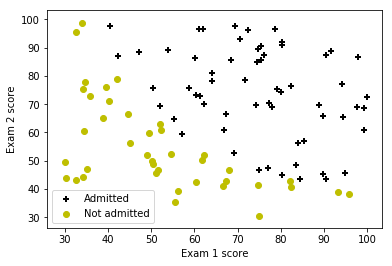

In [5]:
plot_data(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [6]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [7]:
def test_sigmoid():
    print(sigmoid(0))
    print(sigmoid(100))
    print(sigmoid(np.zeros(2)))

In [8]:
test_sigmoid()

0.5
1.0
[0.5 0.5]


### 1.2.2 Cost function and gradient

In [9]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

In [10]:
def cost_function(theta, X, y):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    J = (-1/m)*(y.T.dot(np.log(hx)) + (1-y).T.dot(np.log(1-hx)))
    
    return J

In [11]:
def gradient(theta, X, y):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    grad = (1/m)*((hx - y.T).dot(X))
    
    return grad.flatten()

In [12]:
theta = np.zeros((X.shape[1]))
cost = cost_function(theta, X, y)
grad = gradient(theta, X, y)

In [13]:
print(cost)
print(grad)

[0.69314718]
[ -0.1        -12.00921659 -11.26284221]


### 1.2.3 Learning parameters using fminunc

In [14]:
res = minimize(cost_function, theta, method='nelder-mead', args=(X,y), options={'disp': True})
print(res)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
 final_simplex: (array([[-25.16130062,   0.20623142,   0.20147143],
       [-25.16135807,   0.20623176,   0.20147199],
       [-25.1613519 ,   0.20623203,   0.20147171],
       [-25.16137971,   0.20623202,   0.20147188]]), array([0.2034977, 0.2034977, 0.2034977, 0.2034977]))
           fun: 0.2034977015902151
       message: 'Optimization terminated successfully.'
          nfev: 287
           nit: 157
        status: 0
       success: True
             x: array([-25.16130062,   0.20623142,   0.20147143])


In [15]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return (p.astype('int'))

In [16]:
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

0.7762915904112411

In [17]:
def plot_decision_boundary(theta, X, y):
    # X is Mx3 matrix, where the first column is an all-ones column for the intercept.
    if (X.shape[1] <= 3):
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:,1])-2, np.max(X[:,1])+2])
        # Calculate the decision boundary line
        plot_y = (-1/theta[2])*(theta[1]*plot_x + theta[0])
        plt.plot(plot_x, plot_y)
        plt.scatter(45, 85, c='r', s=20, label='(45, 85)')
        plot_data(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted', plt.gca())

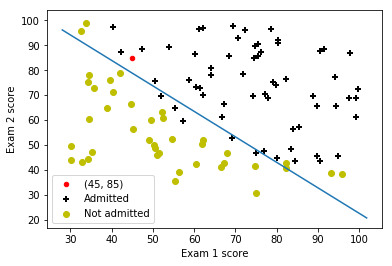

In [18]:
plot_decision_boundary(res.x, X, y)

### 2.1 Visualizing the data

In [19]:
data2 = load_data('./ex2data2.txt', ',')

Shape:  (118, 3)
First row:  [-0.092742  0.68494   1.      ]


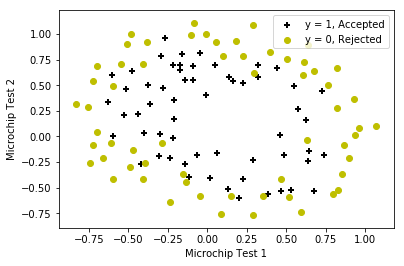

In [20]:
plot_data(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1, Accepted', 'y = 0, Rejected')

### 2.2 Feature Mapping

In [21]:
poly = PolynomialFeatures(6)
m_X = poly.fit_transform(data2[:,0:2])
y = np.c_[data2[:,2]]
print(m_X.shape)

(118, 28)


### 2.3 Cost function and gradient

In [22]:
def cost_function_reg(theta, X, y, lamb=1):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    J = (-1/m)*(y.T.dot(np.log(hx)) + (1-y).T.dot(np.log(1-hx))) + (lamb/(2*m))*np.sum(np.power(theta[1:],2))
    
    return J

In [23]:
def gradient_reg(theta, X, y, lamb=1):
    m = len(y)
    hx = sigmoid(X.dot(theta.reshape(-1,1)))
    grad = (1/m)*(hx-y).T.dot(X) + (lamb/m)*np.c_[[0], [theta[1:]]]
    
    return grad.flatten()

In [24]:
theta = np.zeros((m_X.shape[1]), dtype=np.float128)
lamb = 1
cost = cost_function_reg(theta, m_X, y, lamb)
grad = gradient_reg(theta, m_X, y)

In [25]:
print(cost)
print(grad)

[0.69314718]
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


### 2.3.1 Learning parameters using fminunc

In [26]:
res2 = minimize(cost_function_reg, theta, method='BFGS', args=(m_X,y), options={'disp': True})
print(res2)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48
      fun: 0.5290027422869821
 hess_inv: array([[ 1.07914494e+01,  1.00370556e+00,  1.21057384e+00,
        -8.74613417e+00, -2.24476840e+00, -1.30928716e+01,
         7.84292846e-01, -1.64458920e+00, -2.48373601e-01,
        -6.52808738e-01, -4.71783887e+00,  2.58090045e+00,
        -4.03086180e+00,  1.03693836e-01, -5.05427419e+00,
        -6.82420970e-02, -2.45499815e-02,  8.83293109e-01,
        -1.68341598e+00, -5.50854697e-01,  2.14265502e+00,
        -2.31021874e+00,  2.03047269e+00, -1.59242293e+00,
         1.32651851e+00, -1.98877488e+00,  2.80730370e-01,
         5.99592040e-01],
       [ 1.00370556e+00,  1.28889758e+01,  4.31839978e+00,
        -6.95995325e+00, -7.08201696e+00, -3.93326053e-03,
         1.69141497e+00,  7.17737769e-01,  2.99492641e+00,
        -3.00897956e+00, -3.78374728e+00, -2.074702

### 2.4 Plotting the decision boundary

In [27]:
def plot_decision_boundary_poly(theta, data):
    x1_min, x1_max = data[:,0].min(), data[:,0].max(),
    x2_min, x2_max = data[:,1].min(), data[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1)
    plot_data(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1, Accepted', 'y = 0, Rejected', plt.gca())

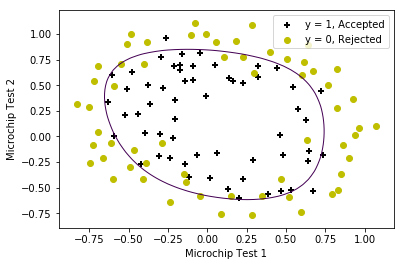

In [28]:
plot_decision_boundary_poly(res2.x, data2)

### 2.5 Optional exercises

In [29]:
def calculate_precision(theta, X, y):
    return sum(predict(theta, X) == y.ravel())/len(y)

In [36]:
def optimize_lamb(theta, m_X, y, data, lamb):
    res = minimize(cost_function_reg, theta, method='BFGS', jac=gradient_reg, args=(m_X,y,lamb), options={'disp': True})
    plot_decision_boundary_poly(res.x, data)
    print('Precision: ', calculate_precision(res.x, m_X, y))

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547
Precision:  0.9152542372881356


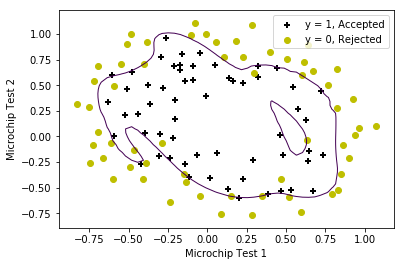

In [37]:
optimize_lamb(theta, m_X, y, data2, lamb=0)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Precision:  0.8305084745762712


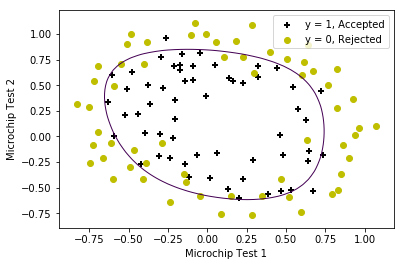

In [38]:
optimize_lamb(theta, m_X, y, data2, lamb=1)

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Precision:  0.6101694915254238


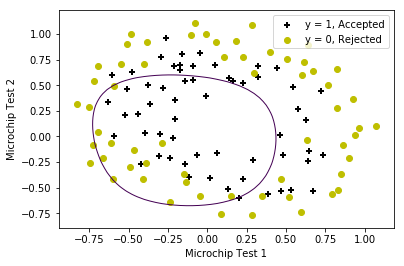

In [39]:
optimize_lamb(theta, m_X, y, data2, lamb=100)